# Binomial Option Pricing Model & Card Game
### Juan Diego Herrera

The code below showcases the implementation of of the binomial option pricing model for European and American options. The final cells solve a bonus problem of a simple card game:

Given a deck of $2n$ red and black cards, each time you draw a black card your payout increases by one; each time you draw a red your payout decreases by one. At any given point in time, what is your current payoff considering that you can always "cash out"?

In [1]:
import math 
import matplotlib.pyplot as plt

### Code for European option pricing
Uses the following:

$ u = 1/d = exp(\sigma \sqrt{h})$

$r = e^{r_cT/n}$ where $T$ is the time in the model and $n$ is the number of steps in the tree

In [2]:
def binomialEuro(CallPut, AssetP, K, T, r, vol, N, Div):
    """
    Implements the binomial option pricing model to price a European option
    Inputs:
            CallPut - True if call, False if Put
            AssetP  - Asset price today
            K       - Strike price of the option
            T       - Time until expiry of the option (years)
            r       - Risk-free interest rate
            vol     - The volatility of the stock
            N       - Number of steps in the model
            Div     - Dividend yield of asset 
    Outputs:
        Price of the price of the option
    """
    dt = T/N # h
    
    b = -1
    if CallPut:
        b = 1 

    u =  math.exp(vol * math.sqrt(dt))
    d = 1/u
    p = (math.exp((r - Div)*dt) - d) / (u-d)
    dF = math.exp(-r *dt) # Discount factor
    
    C = {}
    
    # Set up asset movements
    for m in range(0, N+1):
            St = AssetP * (u**m) * (d**(N - m))
            C[(N, m)] = max(b*(St - K), 0)

    # Recursive setp
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] =  (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)]) * dF
    return C[(0,0)]

### Code for American option pricing
Uses the following:

$ u = 1/d = exp(\sigma \sqrt{h})$

$r = e^{r_cT/n}$ where $T$ is the time in the model and $n$ is the number of steps in the tree

In [3]:
def binomialAmerican(CallPut, AssetP, K, T, r, vol, N, Div, rcFlag = False):
    """
    Implements the binomial option pricing model to price a American option
    Inputs:
            CallPut - True if call, False if Put
            AssetP  - Asset price today
            K       - Strike price of the option
            T       - Time until expiry of the option
            r       - Risk-free interest rate
            vol     - The volatility of the stock
            N       - Number of steps in the model
            Div     - Dividend yield of asset 
    Outputs:
            Price of the price of the option
    """
    dt = T/N #h
    
    b = -1
    if CallPut:
        b = 1 

    u =  math.exp(vol * math.sqrt(dt))
    d = 1/u
    p = (math.exp((r - Div)*dt) - d) / (u-d)
    dF = math.exp(-r *dt) # Discount factor
    
    C = {}
    
    # Set up asset movements
    for m in range(0, N+1):
            St = AssetP * (u**m) * (d**(N - m))
            C[(N, m)] = max(b*(St - K), 0)

    # Recursive setp
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] =  max( (b * (AssetP * (u**m) * (d ** (abs(m-k))) - K)),\
                              ((p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)]) * dF))
    return C[(0,0)]

### Testing the output
We're pricing options  with the following qualities:

Stock price = $10 

Strike = $10

T = 1 (year)

$r_c$ = 5%

$\sigma$ = 25%

Dividend Yield = 0

### Price equality

First, notice how in this case, the European and American calls are priced the same regardless of the step

In [4]:
for i in range(1, 101, 20):
    e = binomialEuro(1, 10, 10, 1, 0.05, 0.25, i, 0,)
    a = binomialAmerican(1, 10, 10, 1, 0.05, 0.25, i, 0,)
    print("European call: %s ----- American call: %s" %(round(e,3), round(a,3)))

European call: 1.457 ----- American call: 1.457
European call: 1.244 ----- American call: 1.244
European call: 1.239 ----- American call: 1.239
European call: 1.237 ----- American call: 1.237
European call: 1.236 ----- American call: 1.236


### European convergence
We now show the convergence of European calls to the Black Scholes model

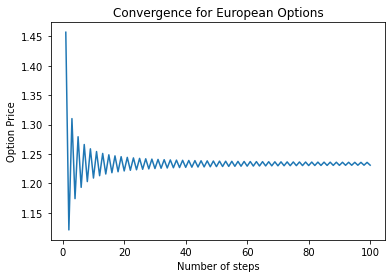

In [5]:
x = []
y = []
for i in range(1, 101):
    y.append(binomialEuro(1, 10, 10, 1, 0.05, 0.25, i, 0))
    x.append(i)
plt.title('Convergence for European Options')
plt.xlabel('Number of steps')
plt.ylabel('Option Price')
plt.plot(x,y)
plt.show()

### Steps until convergence
The graph above raises the question

*How many steps do we need until we converge to have an error less than a penny?*

**Note:** The Black-Scholes price for this option is 1.233599893

In [6]:
blackScholes = 1.233599893
p = -1
i = 1
while not abs(p-blackScholes) < 0.01:
    p = binomialEuro(1, 10, 10, 1, 0.05, 0.25, i, 0)
    i +=1
print(i)

24


**Answer:** We only need 24 steps in the tree

### Put price disparity
Though the American and European call have similar prices, the same does not hold for puts, as shown graphically

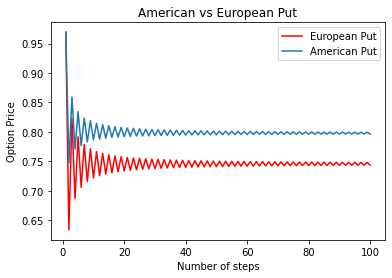

In [7]:
x = []
y = []
x1 = []
y1 = []
for i in range(1, 101):
    y.append(binomialEuro(0, 10, 10, 1, 0.05, 0.25, i, 0))
    x.append(i)
for i in range(1, 101):
    y1.append(binomialAmerican(0, 10, 10, 1, 0.05, 0.25, i, 0))
    x1.append(i)
plt.title('American vs European Put')
plt.xlabel('Number of steps')
plt.ylabel('Option Price')
plt.plot(x,y, 'r')
plt.plot(x1,y1)
plt.legend(['European Put', 'American Put'])
plt.show()

### Steps until (American) put convergence
Again, we can also ask

*How long does it take for American puts to converge (the price
change from an extra step is less than a single penny)?*

In [8]:
p0 = binomialAmerican(1, 10, 10, 1, 0.05, 0.25, 1, 0) 
p1 = binomialAmerican(1, 10, 10, 1, 0.05, 0.25, 2, 0) 
i = 3
while not abs(p1 - p0) < 0.01:
    p0 = p1
    p1 = binomialAmerican(0, 10, 10, 1, 0.05, 0.25, i, 0) 
    i +=1
print(i)

33


**Answer:** 33 steps

### Difference in the code for pricing

*What causes this difference between American an European options?*

The difference lies in the fact that American options can be executed at any time. This means that not only does the program need to find the price of the by option looking at different branches in the tree, it *also* needs to compare said price with the payout of executing the option at the given time. This can cause that situations where the option holder is better off executing the call before expiration. This is most clear with puts, since it is not optimal to execute an American call prior to expiraiton

## Card Game 

### Code for card game

In [9]:
def cardGame(cards, blackDrawn, redDrawn):
    '''
    Compute the expected payoff of the card game given the amount of cards and the number of cards drawn
    Inputs:
            cards      - The total number of cards in the deck; MUST BE AN EVEN NUMBER
            blackDrawn - Number of black cards drawn thus far
            redDrawn   - Number of red cards drawn thus far
    Outputs:
            Max between the expected payoff and the current winning given the number of red and black cards drawn
    '''
    red = int(cards/2)
    black = int(cards/2)
    # Valid argument checks
    if cards % 2 != 0:
        raise Exception("Uneven number of cards!")
    if blackDrawn > black or blackDrawn < 0:
        raise Exception("Invalid number of drawn cards!")
    if redDrawn > red or redDrawn < 0:
        raise Exception("Invalid number of drawn cards!")

    # Computation
    payoff = {}
    for b in range(black, -1, -1):
        for r in range(red, -1, -1):
            if b == black and r == red: # no payoff if you're out of cards
                payoff[b, r] = 0
            elif b == black: # you're out of black - pick a red
                payoff[b,r] = max( (b-r), (b-r-1))
            elif r == red: # you're out of red - pick a black
                payoff[b,r] = max(0 , (b+1-r))
            else:
                cardsleft = cards - b - r
                oddBlack = (black - b)/cardsleft
                oddRed   = (red - r)/cardsleft
                payoff[b,r] = max(0, (oddBlack*payoff[b+1,r] + oddRed*payoff[b,r+1]))
    # Return item with specified number of cards drawn
    return payoff[blackDrawn, redDrawn]

### Testing the card game

In this example we have a simple deck of 4 cards. 2 red, 2 black.

We'd like to see what our payoff would be if we had drawn 1 red card thus far

In [10]:
cardGame(4, 0,1)

0.3333333333333333

Notice how our current winning thus far would be -1, yet the payoff is $\frac{1}{3}$. This is because at the worse case, our total payoff is 0 - yet we still have a chance for ending net positive if we draw black cards in the next turns

We can see this because the payoff of drawing 1 black and 1 red is 0.5 (see below), and we have a $\frac{2}{3}$ chance of this outcome of happening

In [11]:
cardGame(4,1,1)

0.5